# АЧХ аналоговых фильтров с заданными параметрам

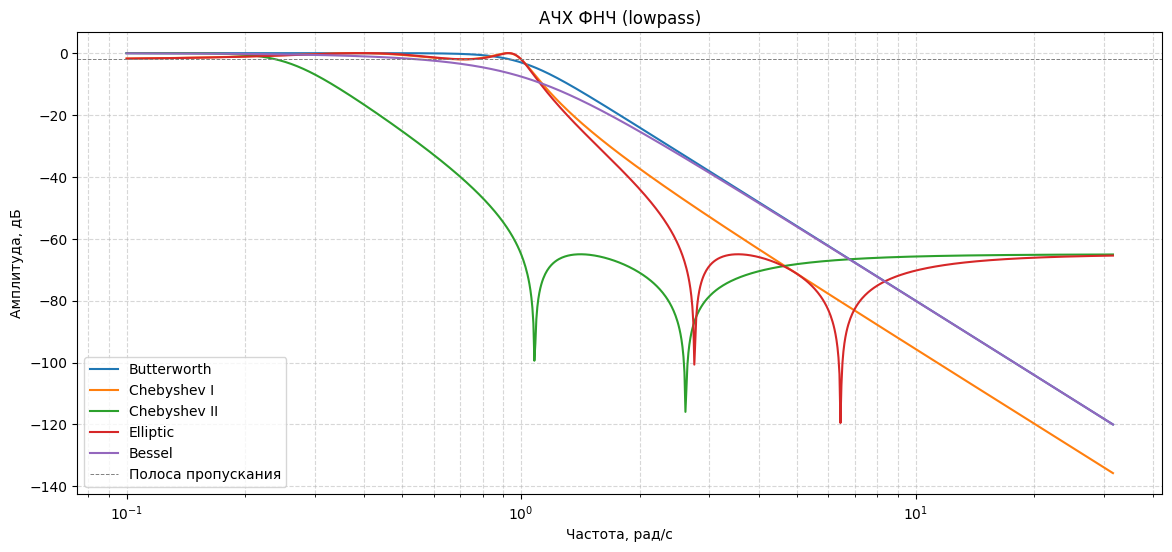

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, cheby2, ellip, bessel, iirfilter, freqs

# ------------------------------
# Параметры фильтров
# ------------------------------
n = 4        # порядок фильтра
Rp = 2       # пульсации в полосе пропускания, дБ
Rs = 65      # пульсации в полосе задерживания, дБ
wc = 1.0     # частота среза для ФНЧ (рад/с)

# Параметры режекторного фильтра (аналог)
w0 = 1.0     # центральная частота вырезаемой полосы (рад/с)
bandwidth = 0.2  # ширина полосы выреза
w1 = w0 - bandwidth/2
w2 = w0 + bandwidth/2

# Частотная сетка для АЧХ
w = np.logspace(-1, 1.5, 1000)

# ------------------------------
# 1. ФНЧ (lowpass)
# ------------------------------
b_butt, a_butt = butter(n, wc, btype='low', analog=True)
b_cheb1, a_cheb1 = cheby1(n, Rp, wc, btype='low', analog=True)
b_cheb2, a_cheb2 = cheby2(n, Rs, wc, btype='low', analog=True)
b_ellip, a_ellip = ellip(n, Rp, Rs, wc, btype='low', analog=True)
b_bess, a_bess = bessel(n, wc, btype='low', analog=True, norm='phase')

w_butt, h_butt = freqs(b_butt, a_butt, worN=w)
w_cheb1, h_cheb1 = freqs(b_cheb1, a_cheb1, worN=w)
w_cheb2, h_cheb2 = freqs(b_cheb2, a_cheb2, worN=w)
w_ellip, h_ellip = freqs(b_ellip, a_ellip, worN=w)
w_bess, h_bess = freqs(b_bess, a_bess, worN=w)


# ------------------------------
# Построение графиков
# ------------------------------
plt.figure(figsize=(14,6))
plt.semilogx(w_butt, 20*np.log10(abs(h_butt)), label='Butterworth')
plt.semilogx(w_cheb1, 20*np.log10(abs(h_cheb1)), label='Chebyshev I')
plt.semilogx(w_cheb2, 20*np.log10(abs(h_cheb2)), label='Chebyshev II')
plt.semilogx(w_ellip, 20*np.log10(abs(h_ellip)), label='Elliptic')
plt.semilogx(w_bess, 20*np.log10(abs(h_bess)), label='Bessel')
plt.title('АЧХ ФНЧ (lowpass)')
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, дБ')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.axhline(-Rp, color='gray', linestyle='--', linewidth=0.7, label='Полоса пропускания')
plt.legend()


# Режекторный фильтр

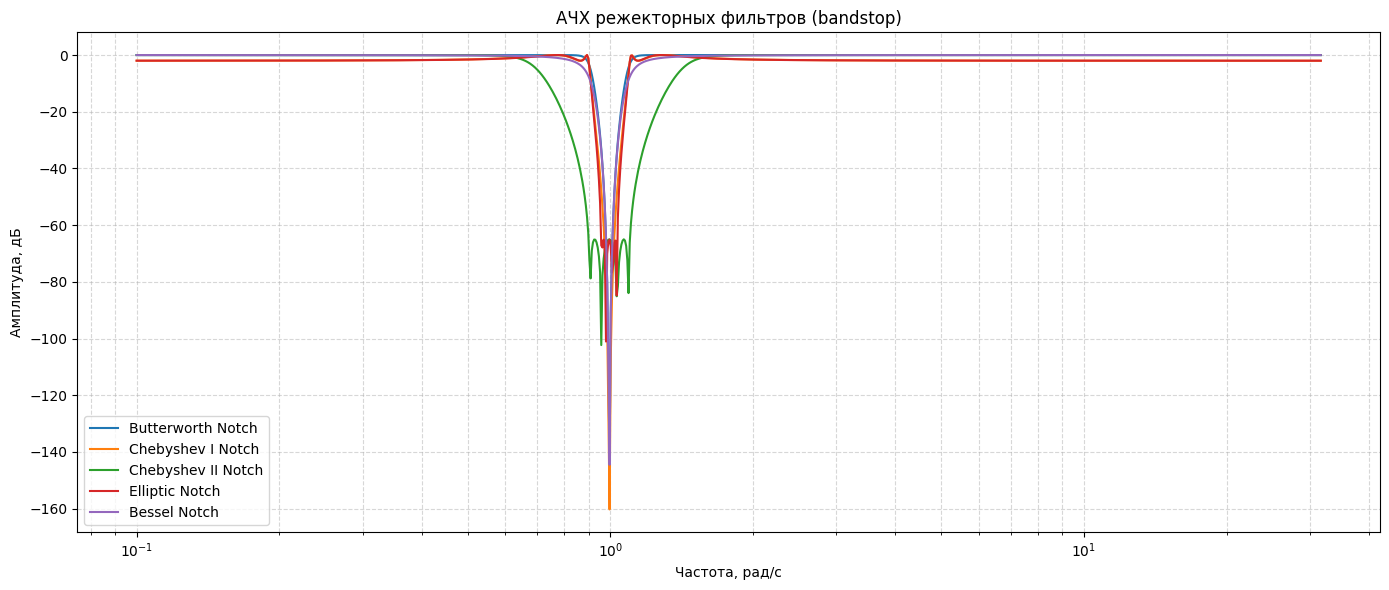

In [4]:
b_notch_butt, a_notch_butt = iirfilter(N=n, Wn=[w1, w2], btype='bandstop', ftype='butter', analog=True)
b_notch_cheb1, a_notch_cheb1 = iirfilter(N=n, Wn=[w1, w2], btype='bandstop', ftype='cheby1', rp=Rp, analog=True)
b_notch_cheb2, a_notch_cheb2 = iirfilter(N=n, Wn=[w1, w2], btype='bandstop', ftype='cheby2', rs=Rs, analog=True)
b_notch_ellip, a_notch_ellip = iirfilter(N=n, Wn=[w1, w2], btype='bandstop', ftype='ellip', rp=Rp, rs=Rs, analog=True)
b_notch_bess, a_notch_bess = iirfilter(N=n, Wn=[w1, w2], btype='bandstop', ftype='bessel', analog=True)

w_notch_butt, h_notch_butt = freqs(b_notch_butt, a_notch_butt, worN=w)
w_notch_cheb1, h_notch_cheb1 = freqs(b_notch_cheb1, a_notch_cheb1, worN=w)
w_notch_cheb2, h_notch_cheb2 = freqs(b_notch_cheb2, a_notch_cheb2, worN=w)
w_notch_ellip, h_notch_ellip = freqs(b_notch_ellip, a_notch_ellip, worN=w)
w_notch_bess, h_notch_bess = freqs(b_notch_bess, a_notch_bess, worN=w)

plt.figure(figsize=(14,6))
plt.semilogx(w_notch_butt, 20*np.log10(abs(h_notch_butt)), label='Butterworth Notch')
plt.semilogx(w_notch_cheb1, 20*np.log10(abs(h_notch_cheb1)), label='Chebyshev I Notch')
plt.semilogx(w_notch_cheb2, 20*np.log10(abs(h_notch_cheb2)), label='Chebyshev II Notch')
plt.semilogx(w_notch_ellip, 20*np.log10(abs(h_notch_ellip)), label='Elliptic Notch')
plt.semilogx(w_notch_bess, 20*np.log10(abs(h_notch_bess)), label='Bessel Notch')
plt.title('АЧХ режекторных фильтров (bandstop)')
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, дБ')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()